# Interpolate bed surface


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import sys
import time
import datetime as dt
import pandas as pd
import geopandas as gpd
import scipy as sp
from scipy import signal
from tqdm.notebook import tqdm

from shapely.geometry import Point, LineString, Polygon, MultiPoint
import fiona
from shapely.ops import nearest_points

In [2]:
simp_bed = gpd.read_file('/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RADAR_MAP/simplified_lines_gdf.shp')

In [3]:
sl = {} #a dictionary of geodataframes of radarlines over KIS2

for line in simp_bed.line_name.unique().tolist():
    sl[line] = simp_bed[simp_bed.line_name==line].reset_index(drop=True).copy()

# Interpolate

## straight gridding. 

In [4]:
extent = [sl['line8'].x.min(),sl['line5'].x.max(),sl['line5'].y.min(),sl['line8'].y.max()]

In [5]:
gdf = simp_bed.query(f'x > {extent[0]} & x < {extent[1]} & y > {extent[2]} & y < {extent[3]} & line_name != "lineAPRESdown" & line_name != "linedownchan"& line_name != "lineupchan"').copy()

In [6]:
new = pd.DataFrame({})

x = np.linspace(extent[0],extent[1], 100)
y = np.linspace(extent[2],extent[3], 100)
xv, yv = np.meshgrid(x ,y ) 

In [7]:
out = np.flipud(sp.interpolate.griddata(gdf.loc[:,['x','y']],gdf.ice_thickn,(xv, yv),method='nearest'))

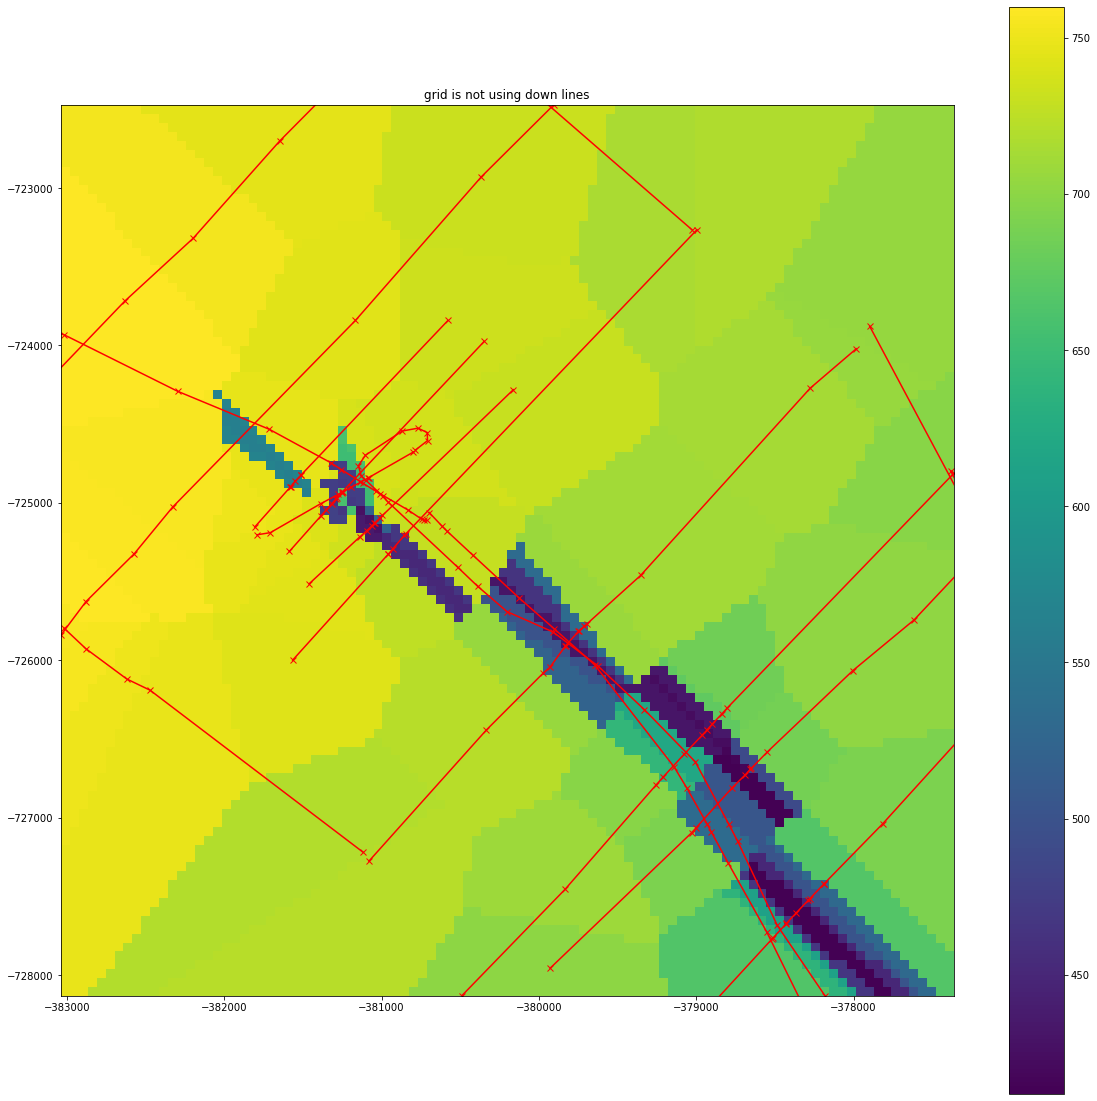

In [8]:
plt.figure(figsize=(20,20))
for sname,sline in sl.items():
    plt.plot(sline.x,sline.y,'rx-',label=sname)
v = [out.min(),out.max()]
plt.imshow(out,extent=extent, vmin=v[0],vmax=v[1])
plt.colorbar()
plt.title('grid is not using down lines')

plt.show()

## use the midlines 

In [9]:
extent = [sl['line8'].x.min(),sl['line5'].x.max(),sl['line5'].y.min(),sl['line8'].y.max()]

In [10]:
gdf = simp_bed.query(f'x > {extent[0]} & x < {extent[1]} & y > {extent[2]} & y < {extent[3]}').copy()

In [11]:
new = pd.DataFrame({})

x = np.linspace(extent[0],extent[1], 100)
y = np.linspace(extent[2],extent[3], 100)
xv, yv = np.meshgrid(x ,y ) 

In [12]:
out = np.flipud(sp.interpolate.griddata(gdf.loc[:,['x','y']],gdf.ice_thickn,(xv, yv),method='nearest'))

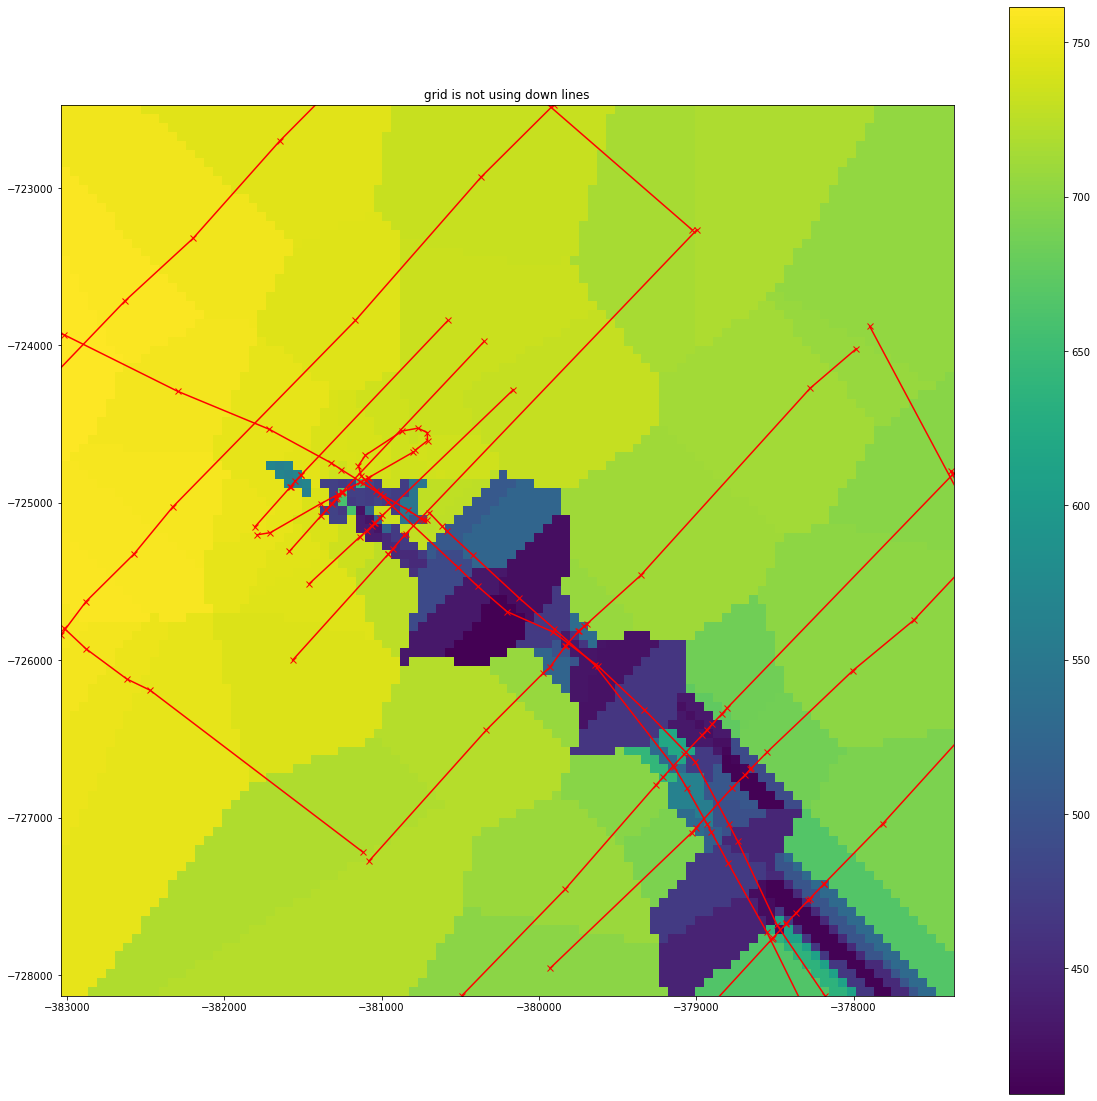

In [13]:
plt.figure(figsize=(20,20))
for sname,sline in sl.items():
    plt.plot(sline.x,sline.y,'rx-',label=sname)
v = [out.min(),out.max()]
plt.imshow(out,extent=extent, vmin=v[0],vmax=v[1])
plt.colorbar()
plt.title('grid is not using down lines')

plt.show()

## whats the best reso?

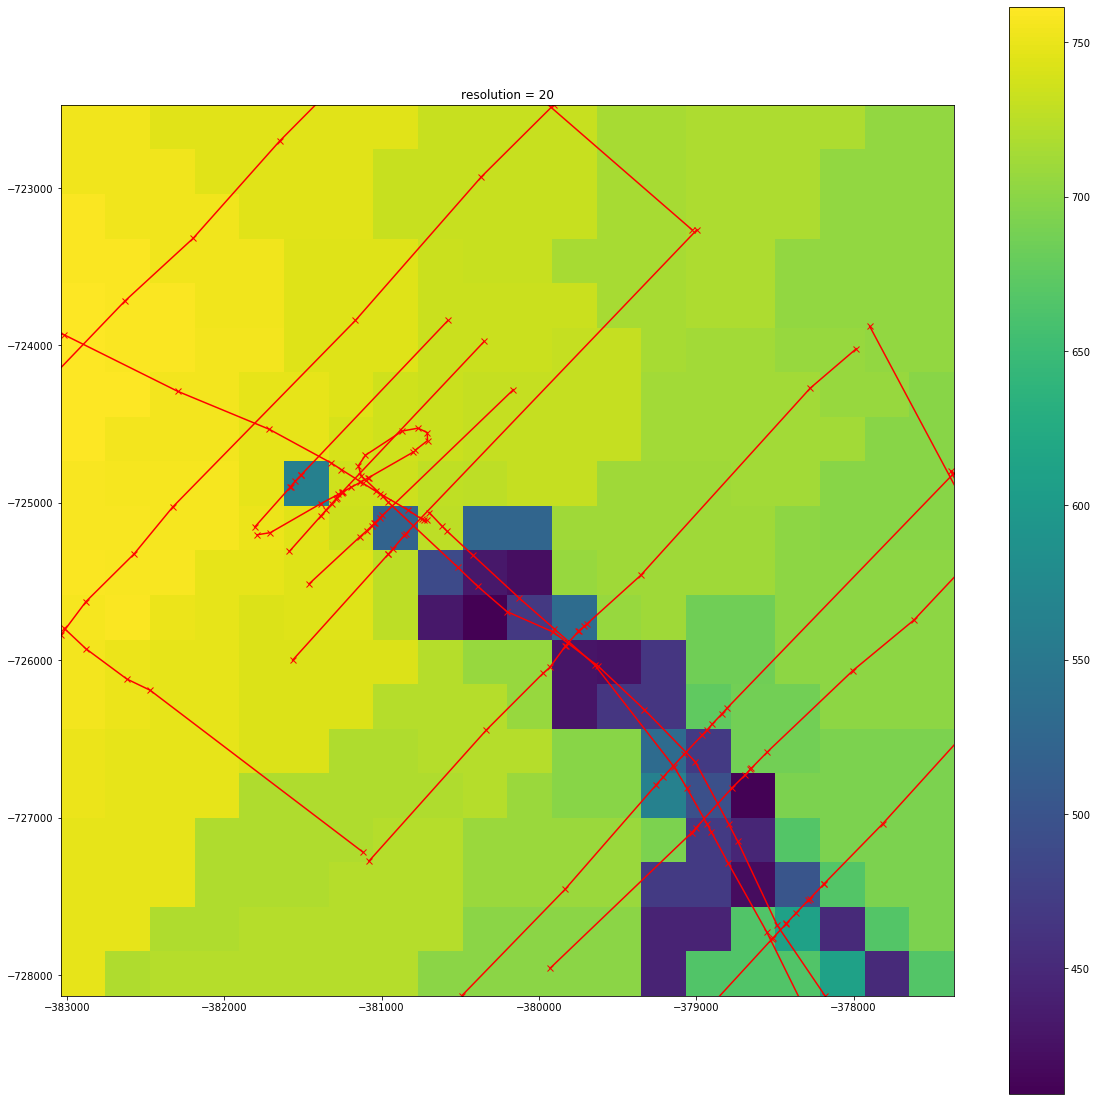

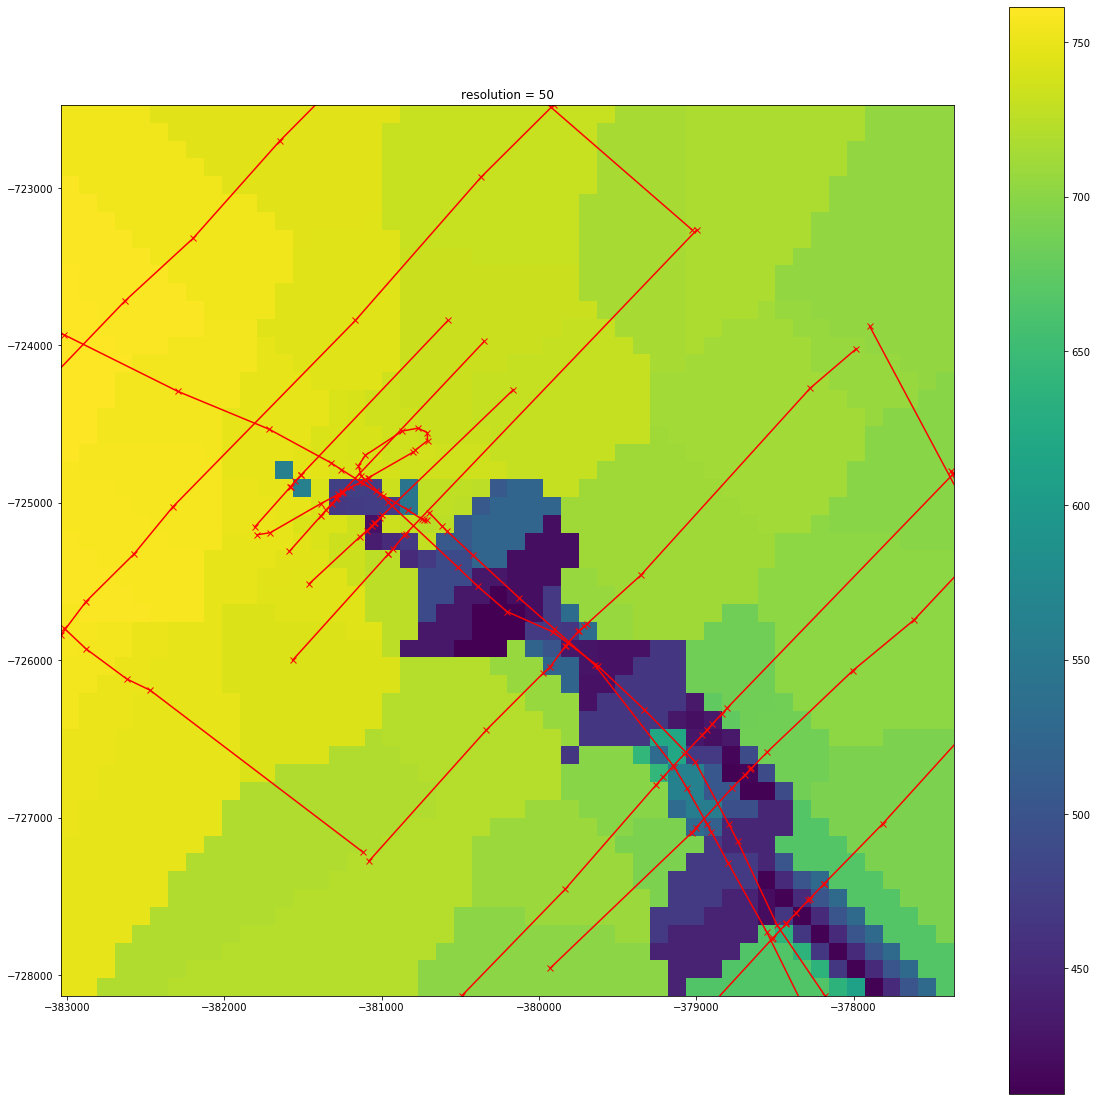

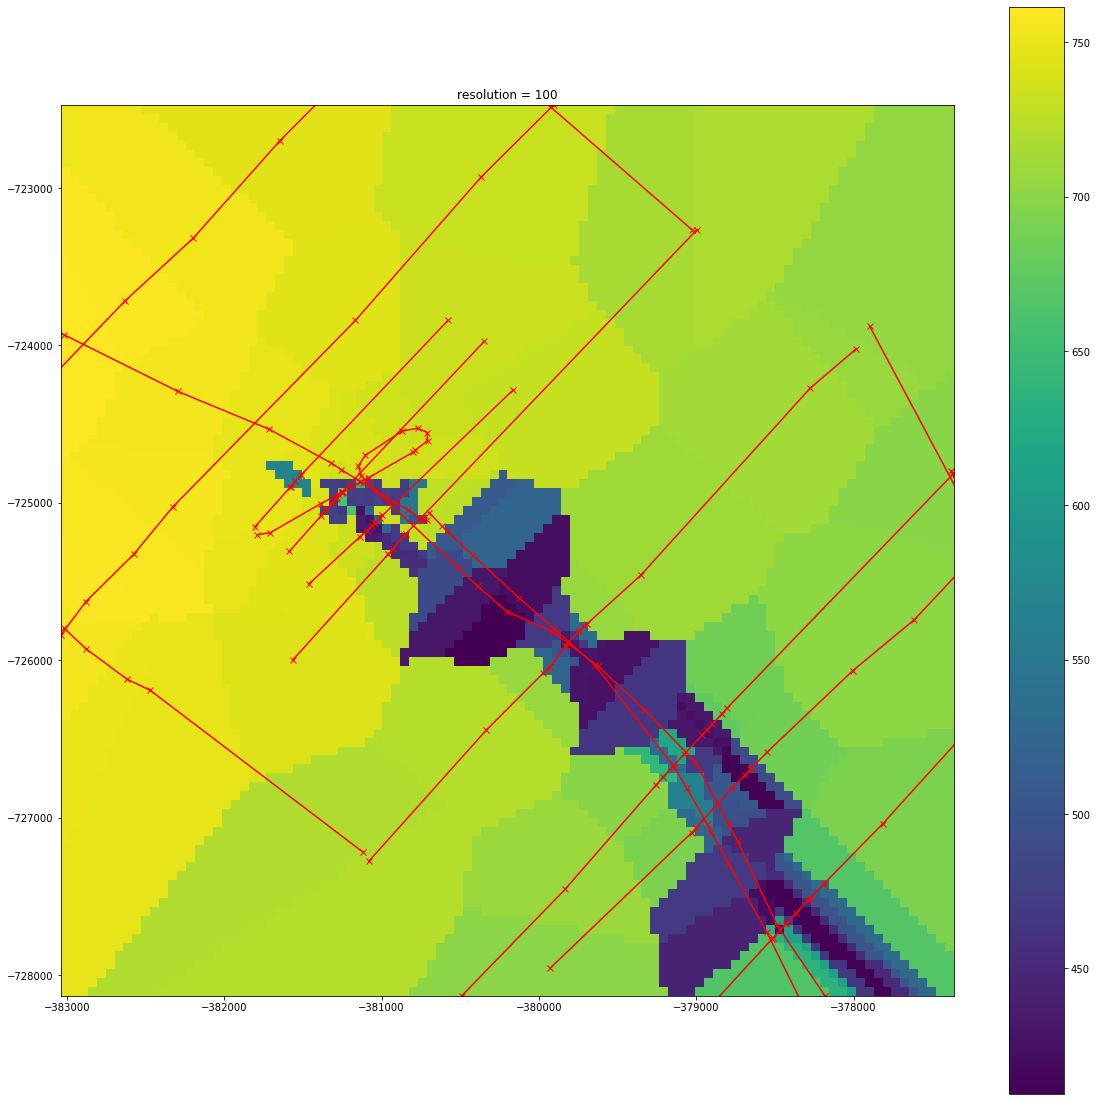

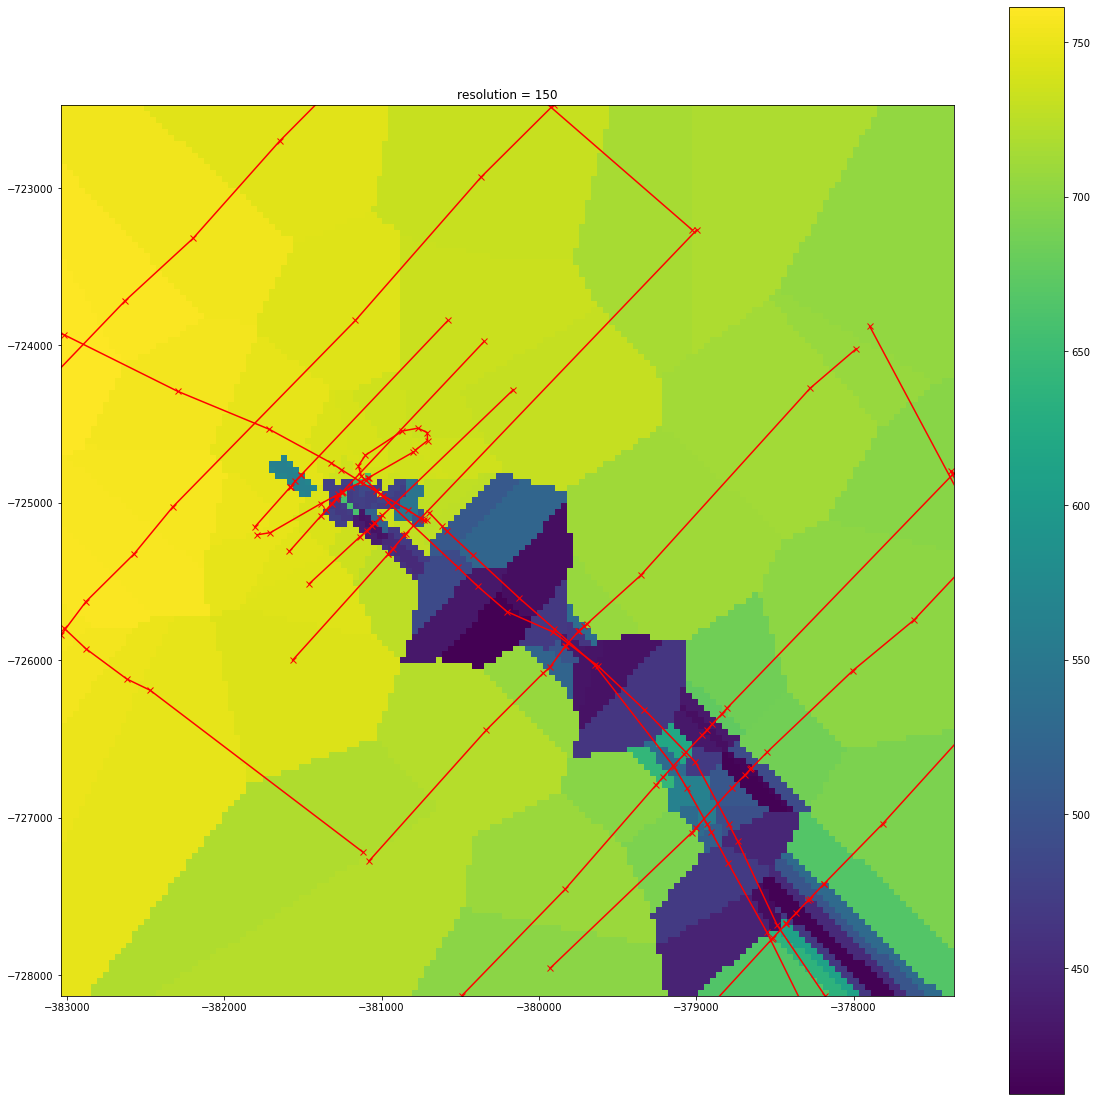

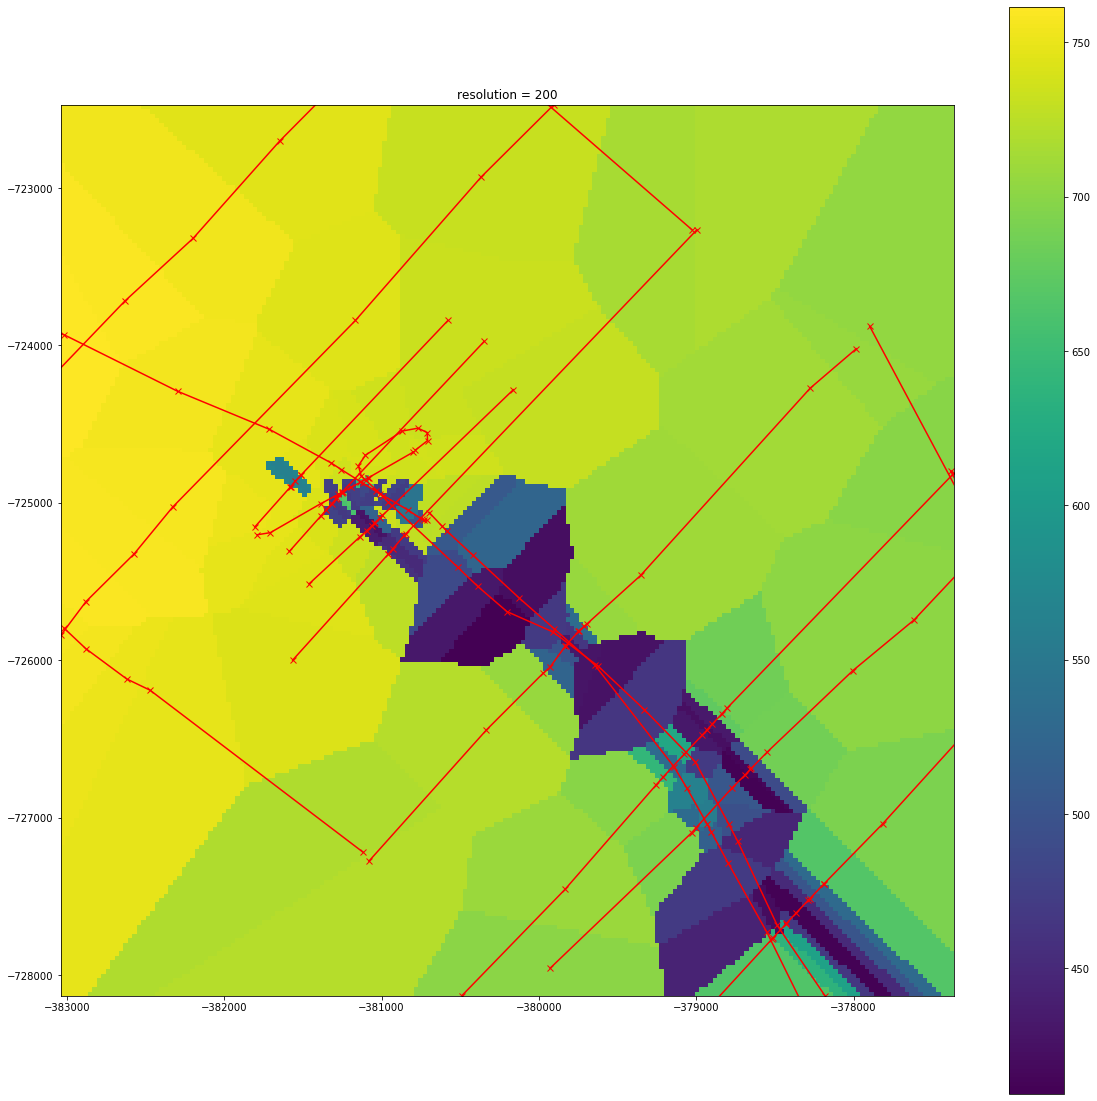

In [14]:
for reso in [20,50,100,150,200]:
    extent = [sl['line8'].x.min(),sl['line5'].x.max(),sl['line5'].y.min(),sl['line8'].y.max()]
    gdf = simp_bed.query(f'x > {extent[0]} & x < {extent[1]} & y > {extent[2]} & y < {extent[3]}').copy()
    new = pd.DataFrame({})
    x = np.linspace(extent[0],extent[1], reso)
    y = np.linspace(extent[2],extent[3], reso)
    xv, yv = np.meshgrid(x ,y ) 
    out = np.flipud(sp.interpolate.griddata(gdf.loc[:,['x','y']],gdf.ice_thickn,(xv, yv),method='nearest'))
    plt.figure(figsize=(20,20))
    for sname,sline in sl.items():
        plt.plot(sline.x,sline.y,'rx-',label=sname)
    v = [out.min(),out.max()]
    plt.imshow(out,extent=extent, vmin=v[0],vmax=v[1])
    plt.colorbar()
    plt.title(f'resolution = {reso}')

    plt.show()

# nearest neighbours is the only one which works

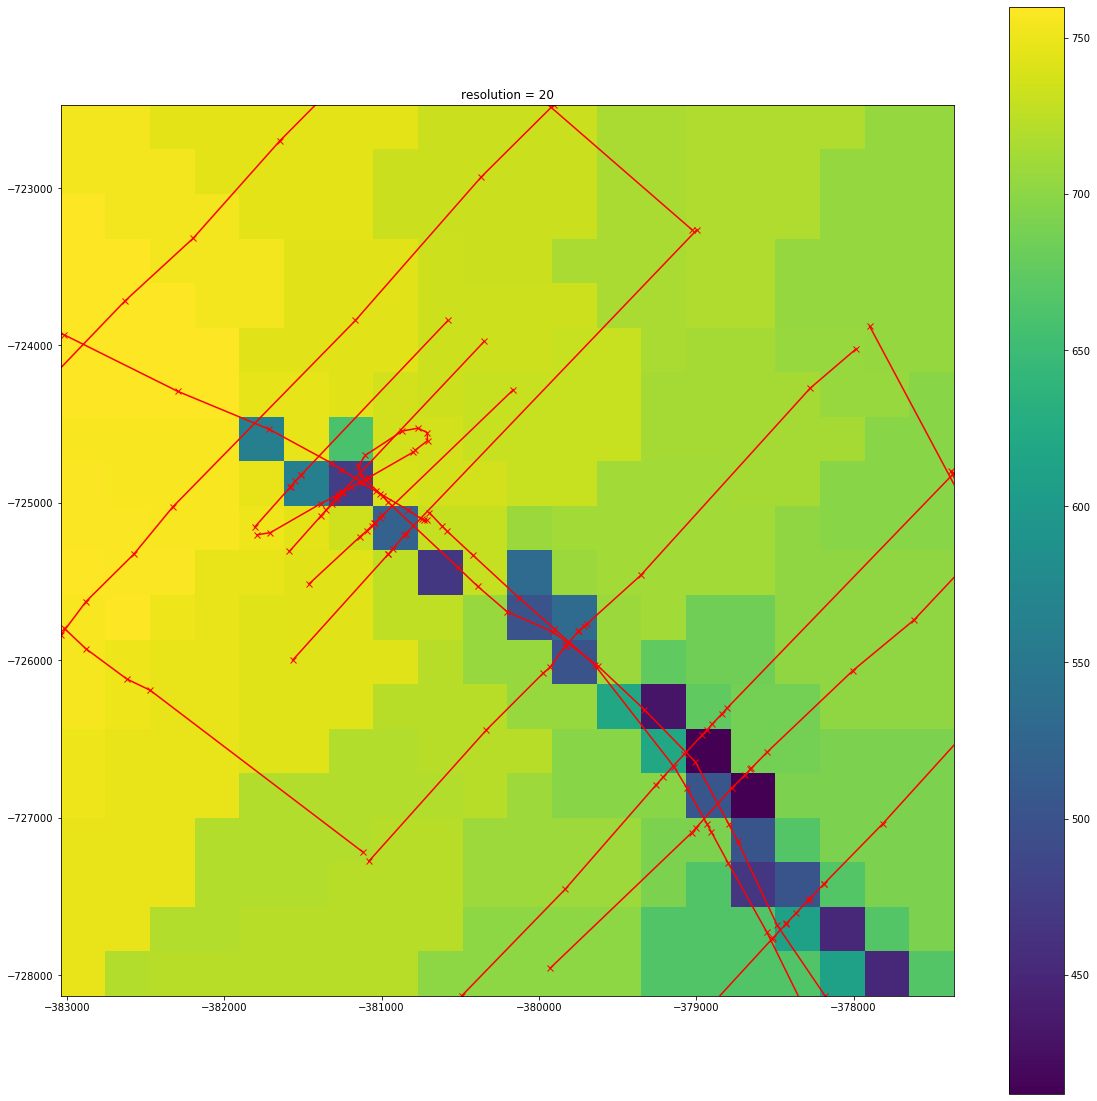

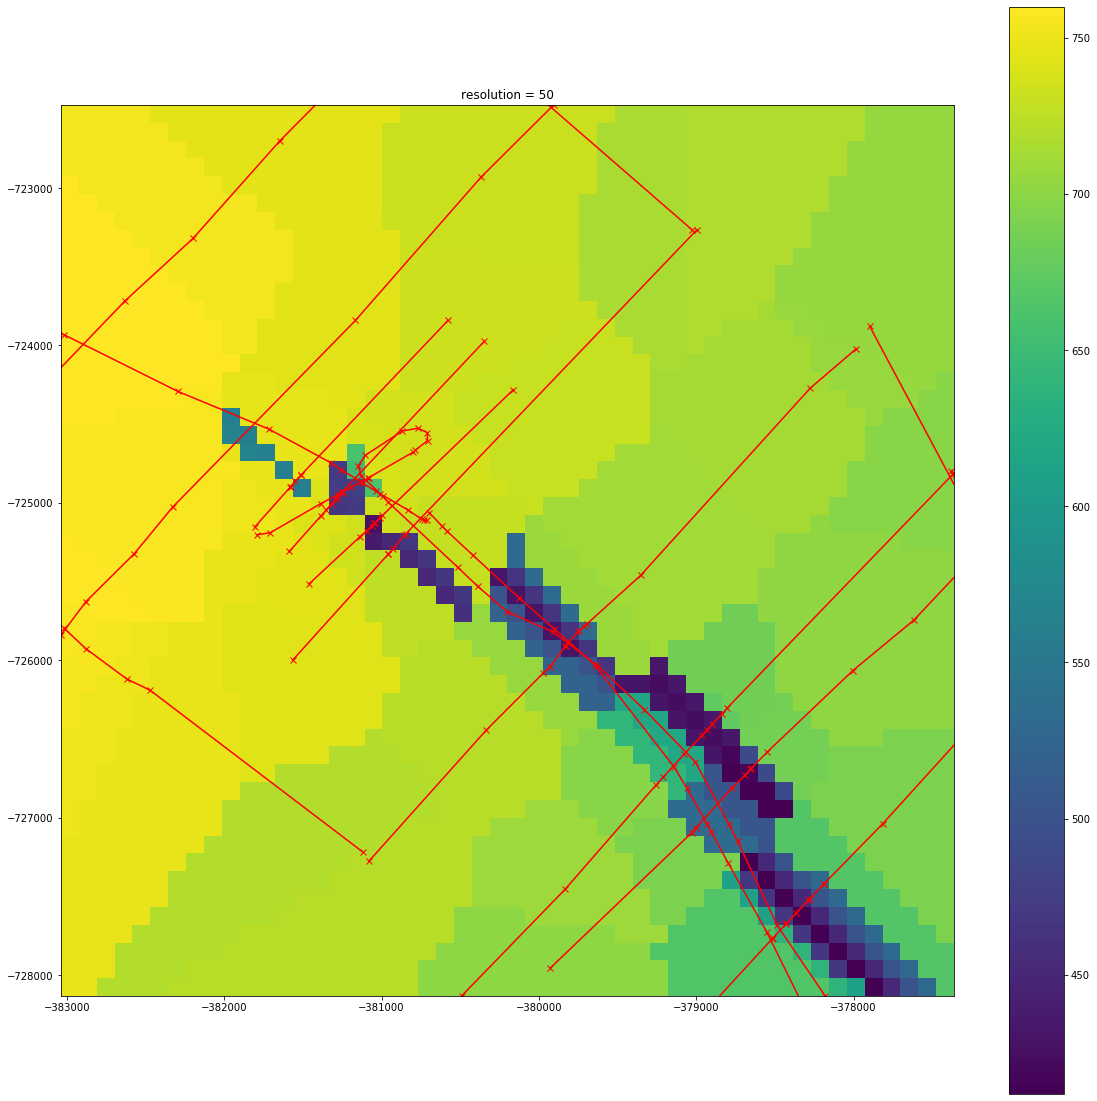

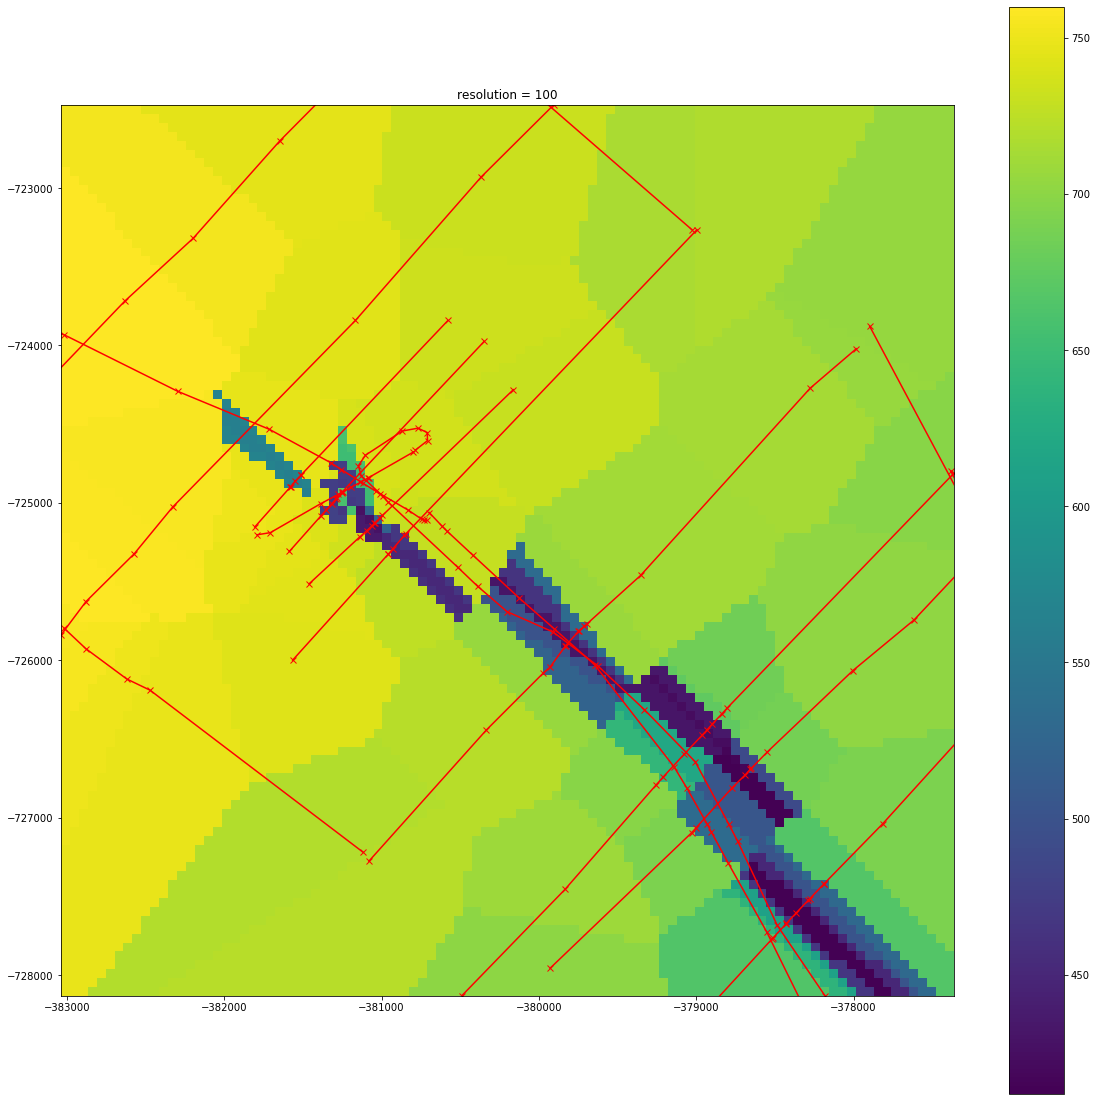

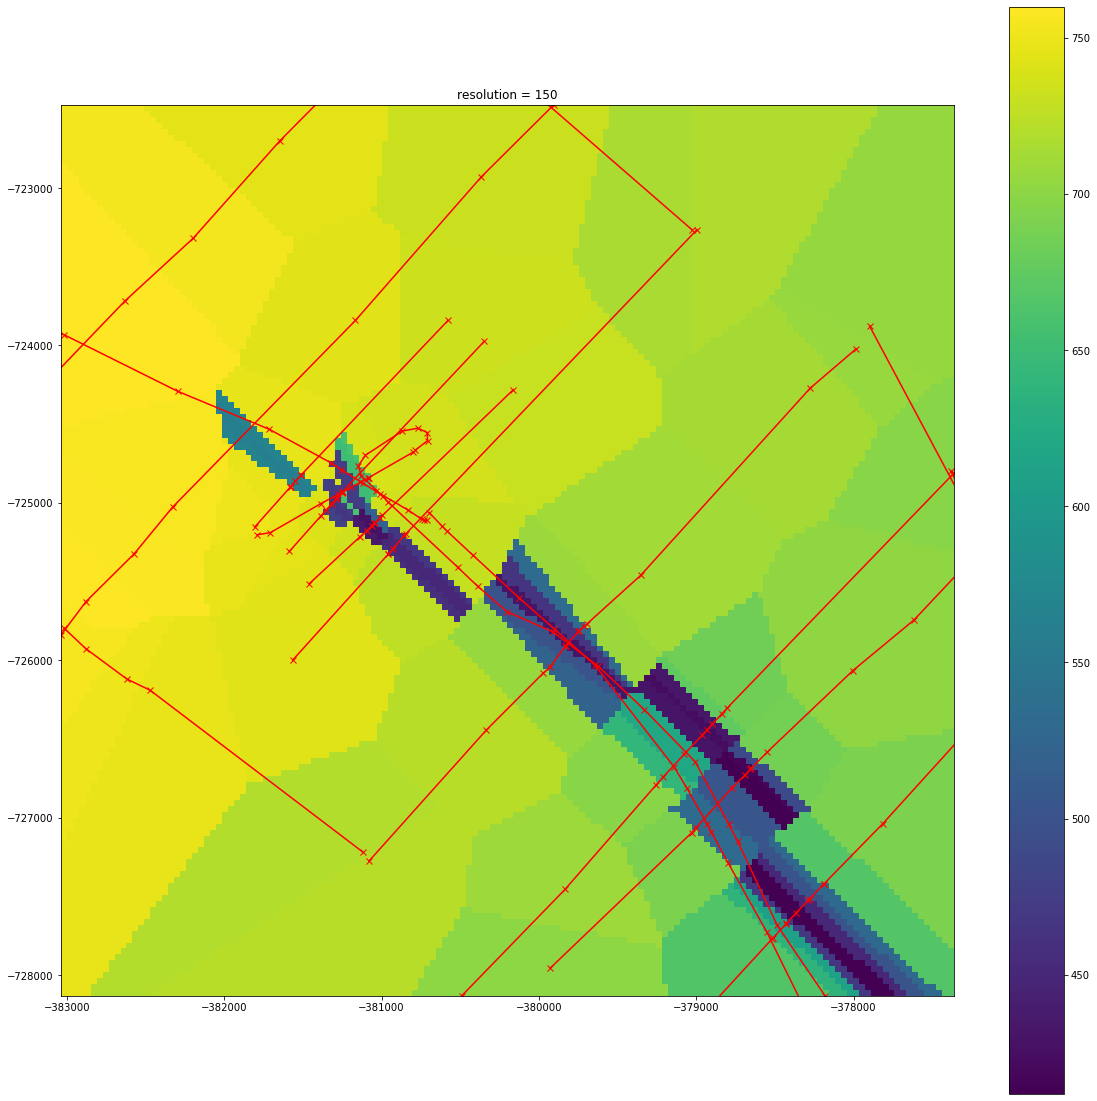

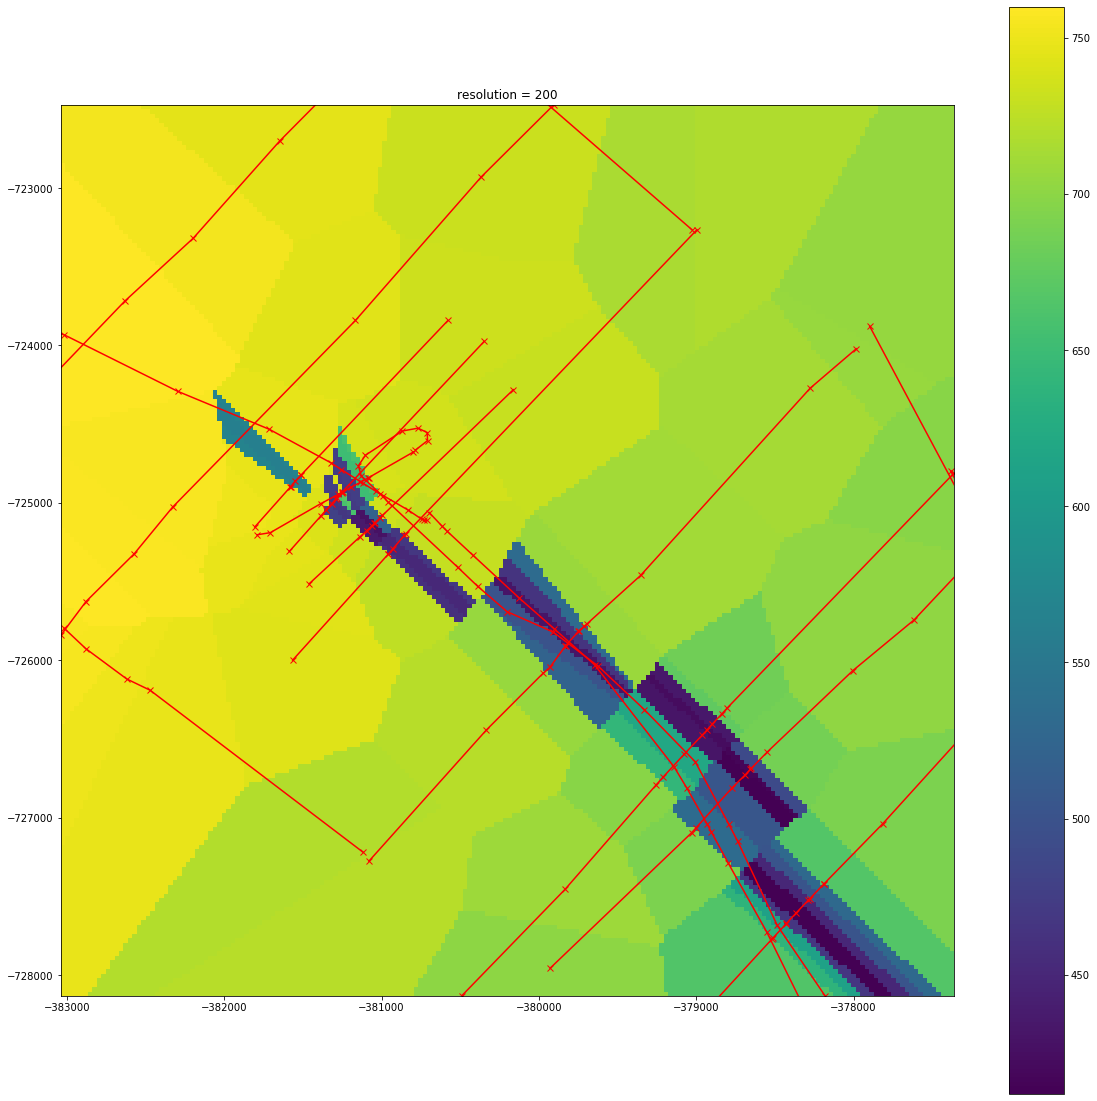

In [15]:
for reso in [20,50,100,150,200]:
    extent = [sl['line8'].x.min(),sl['line5'].x.max(),sl['line5'].y.min(),sl['line8'].y.max()]
    gdf = simp_bed.query(f'x > {extent[0]} & x < {extent[1]} & y > {extent[2]} & y < {extent[3]} & line_name != "lineAPRESdown" & line_name != "linedownchan"& line_name != "lineupchan"').copy()
    new = pd.DataFrame({})
    x = np.linspace(extent[0],extent[1], reso)
    y = np.linspace(extent[2],extent[3], reso)
    xv, yv = np.meshgrid(x ,y ) 
    out = np.flipud(sp.interpolate.griddata(gdf.loc[:,['x','y']],gdf.ice_thickn,(xv, yv),method='nearest'))
    plt.figure(figsize=(20,20))
    for sname,sline in sl.items():
        plt.plot(sline.x,sline.y,'rx-',label=sname)
    v = [out.min(),out.max()]
    plt.imshow(out,extent=extent, vmin=v[0],vmax=v[1])
    plt.colorbar()
    plt.title(f'resolution = {reso}')

    plt.show()